<a href="https://colab.research.google.com/github/rand-albej/Disease_Prediction_ML/blob/main/Disease_Prediction_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Disease prediction ML model based on symptoms**

### Import The Required Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### Data Loading

In [ ]:
# Load the dataset
data_path = '/content/symbipredict_2022.csv'
data = pd.read_csv(data_path)

In [ ]:
data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal Infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal Infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal Infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal Infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal Infection


### Data Cleaning

In [ ]:
# Check for missing values in the dataset
data.isnull().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

In [ ]:
# Check for duplicates and remove them
print("Number of duplicates before removal:", data.duplicated().sum())
data = data.drop_duplicates(keep='first')
data.reset_index(drop=True, inplace=True)

Number of duplicates before removal: 4657


In [ ]:
data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal Infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal Infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal Infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal Infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal Infection


### Data Visualization

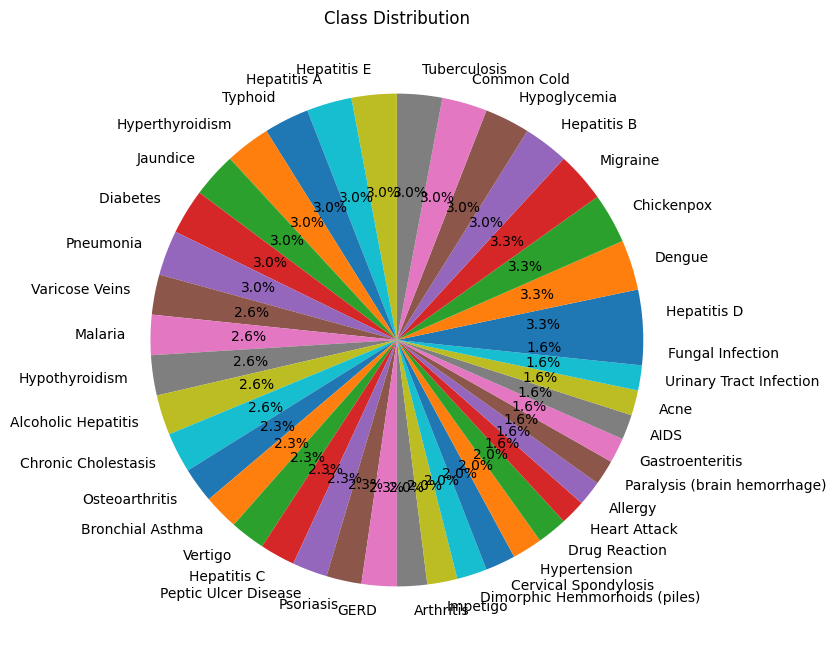

In [ ]:
# Visualize class distribution using a pie chart
plt.figure(figsize=(8, 8))
data['prognosis'].value_counts().plot.pie(autopct='%1.1f%%')
plt.ylabel('')
plt.title('Class Distribution')
plt.show()


### Feature Selection and Splitting

In [ ]:
# Prepare data for model training
X = data.drop('prognosis', axis=1)  # Features
y = data['prognosis']  # Target variable

In [ ]:
# Split the dataset into training and testing sets, stratifying to maintain class proportions
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Feature Standardization

In [ ]:
# Feature Scaling to normalize data for optimal performance in algorithms like SVM and KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Model Setup

In [ ]:
# Model setup with a dictionary to store and evaluate multiple models
models = {
    "Logistic Regression": LogisticRegression(penalty='l2', max_iter=10000),
    "Decision Tree": DecisionTreeClassifier(max_depth=5),
    "Random Forest": RandomForestClassifier(max_depth=5, n_estimators=50),
    "Support Vector Machine": SVC(kernel='linear', probability=True),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5)
}

### Cross-Validation

In [ ]:
# Evaluate each model using stratified k-fold cross-validation
results = {}
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # StratifiedKFold to maintain class distribution
for name, model in models.items():
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=kf, scoring='accuracy')
    results[name] = cv_scores
    print(f"{name}: Mean CV Accuracy = {cv_scores.mean()}")

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Logistic Regression: Mean CV Accuracy = 0.9835034013605443
Decision Tree: Mean CV Accuracy = 0.1442176870748299


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Random Forest: Mean CV Accuracy = 0.8892006802721089


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Support Vector Machine: Mean CV Accuracy = 0.950765306122449
K-Nearest Neighbors: Mean CV Accuracy = 0.9712585034013607


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


### Model Training and Evaluation

In [ ]:
# Train each model on the training set and evaluate on the test set
final_results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    final_results[name] = accuracy
    print(f"{name}: Test Accuracy = {accuracy*100:.2f}%")

Logistic Regression: Test Accuracy = 98.36%
Decision Tree: Test Accuracy = 19.67%
Random Forest: Test Accuracy = 88.52%
Support Vector Machine: Test Accuracy = 98.36%
K-Nearest Neighbors: Test Accuracy = 98.36%


### Performance Metrics

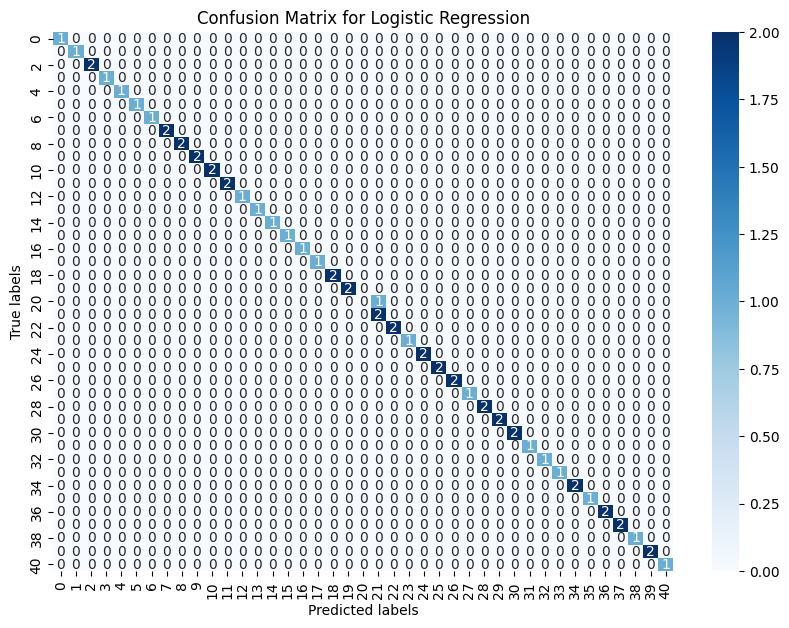

In [ ]:
# Confusion matrix for the Logistic Regression model
cm = confusion_matrix(y_test, models['Logistic Regression'].predict(X_test_scaled))
# Visualization of the confusion matrix using seaborn's heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()


In [ ]:
# Classification report for Logistic Regression
print("Classification Report for Logistic Regression:")
print(classification_report(y_test, models['Logistic Regression'].predict(X_test_scaled)))

Classification Report for Logistic Regression:
                               precision    recall  f1-score   support

                         AIDS       1.00      1.00      1.00         1
                         Acne       1.00      1.00      1.00         1
          Alcoholic Hepatitis       1.00      1.00      1.00         2
                      Allergy       1.00      1.00      1.00         1
                    Arthritis       1.00      1.00      1.00         1
             Bronchial Asthma       1.00      1.00      1.00         1
         Cervical Spondylosis       1.00      1.00      1.00         1
                   Chickenpox       1.00      1.00      1.00         2
          Chronic Cholestasis       1.00      1.00      1.00         2
                  Common Cold       1.00      1.00      1.00         2
                       Dengue       1.00      1.00      1.00         2
                    Diabetes        1.00      1.00      1.00         2
Dimorphic Hemmorhoids (piles)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Model Comparison

Learning curves for Logistic Regression:


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


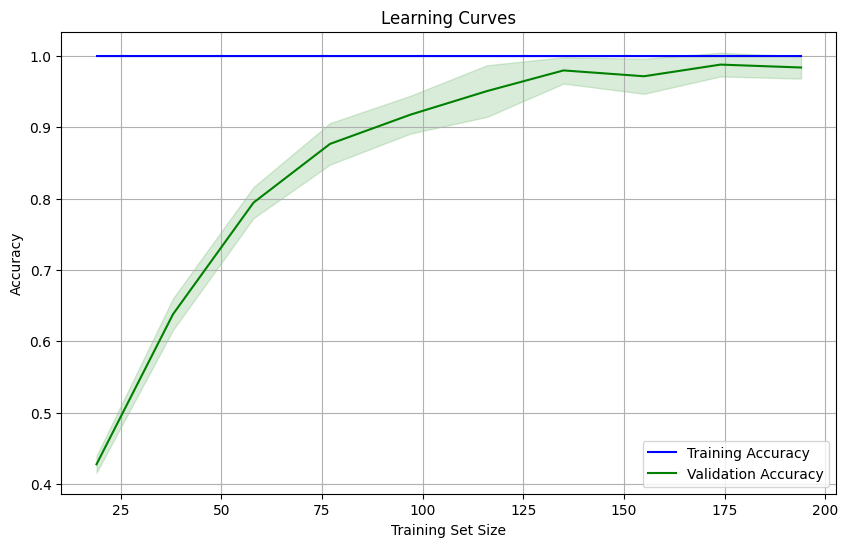

Learning curves for Decision Tree:


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


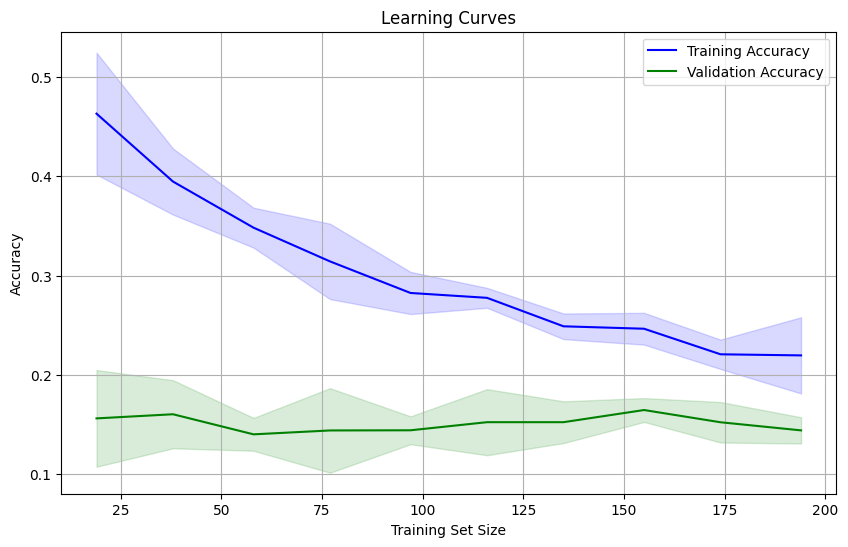

Learning curves for Random Forest:


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


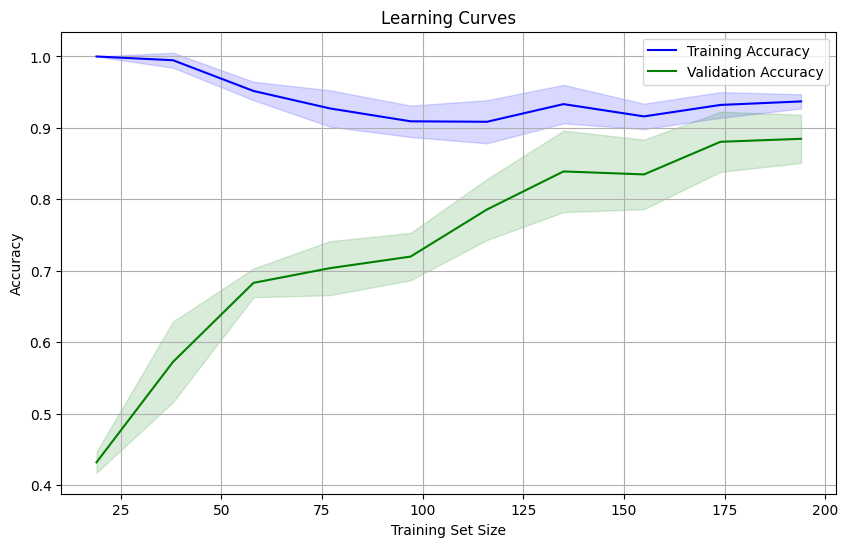

Learning curves for Support Vector Machine:


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


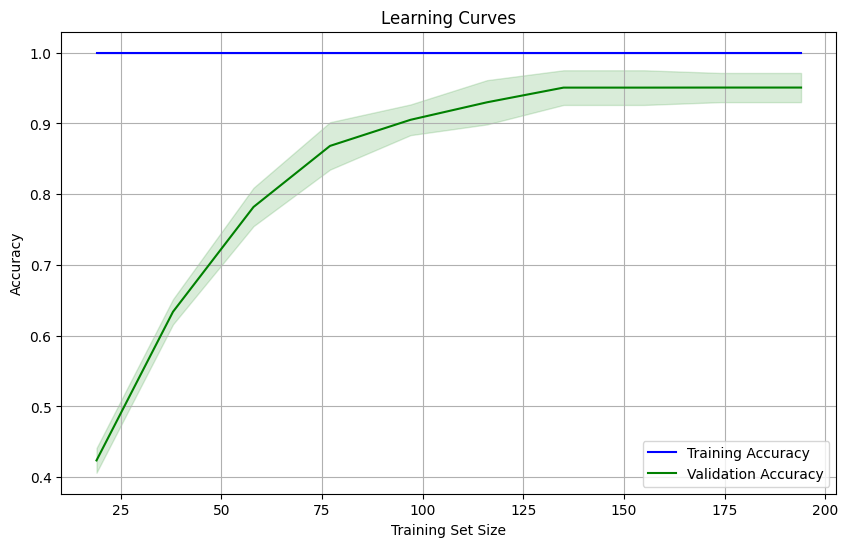

Learning curves for K-Nearest Neighbors:


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


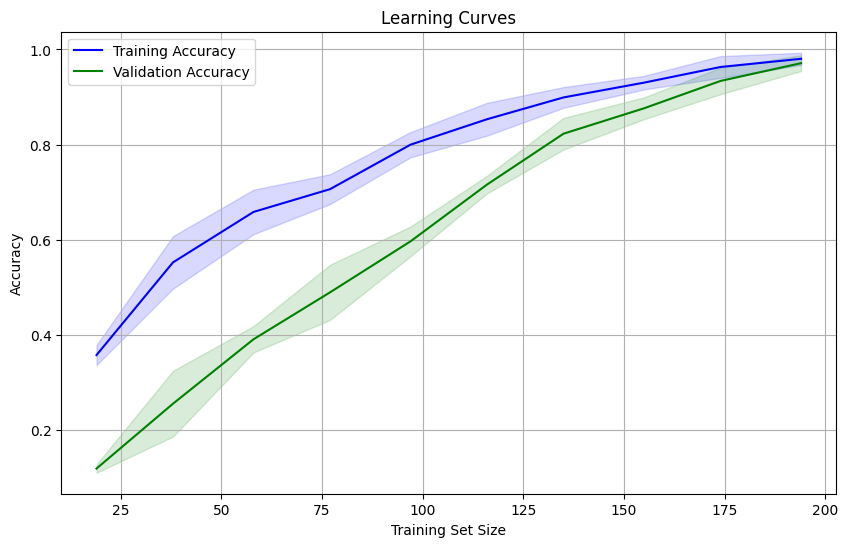

In [ ]:
# Function to plot learning curves for each model
def plot_learning_curves(model, X, y):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=kf, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy')
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, label='Training Accuracy', color='blue')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
    plt.plot(train_sizes, test_mean, label='Validation Accuracy', color='green')
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15, color='green')

    plt.title('Learning Curves')
    plt.xlabel('Training Set Size')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot learning curves for each model
for name, model in models.items():
    print(f"Learning curves for {name}:")
    plot_learning_curves(model, X_train_scaled, y_train)